<a href="https://colab.research.google.com/github/Sanjeet2835/Classification---ML/blob/main/Softmax_Multinomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('iris')

#Note:
sns.load_dataset("iris") loads the dataset as a Pandas DataFrame.
Since the returned object is a Pandas DataFrame, all Pandas functions (like .iloc, .loc, .head(), **etc**.) work on it.
Seaborn only provides the dataset, but everything else (indexing, manipulation) is handled by Pandas.

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
encoder = LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#Storing input in X
X = df.iloc[:,0:2]                 #iloc[rows_start:rows_end, columns_start:columns_end]
#Storing output in y
y= df.iloc[:,-1]                    #all rows and last (output) column

In [ ]:
X

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9


In [ ]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,7,2
2,0,1,10


In [ ]:
# prediction
query = np.array([[3.4,2.7]])
classifier.predict_proba(query)  #gives probabilites for each class, class with highest P will be output

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.92512537e-01, 7.30695727e-03, 1.80505674e-04]])

In [ ]:
classifier.predict(query)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


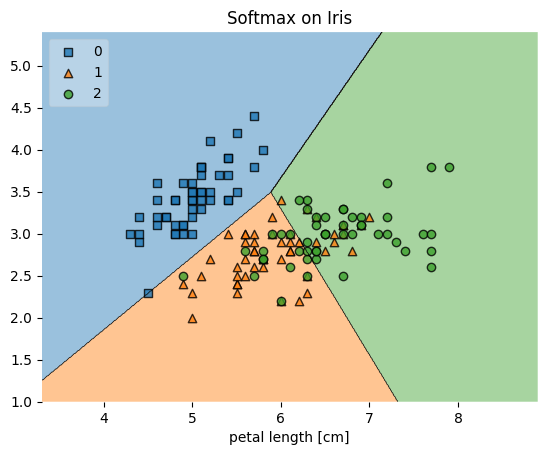

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, classifier, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')
plt.show()